1) Importe as bibliotecas necessárias e faça a montagem do drive.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


2)  Realize a leitura do dataset disponível no SIGAA e apresente os dados lidos.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/vendas.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


3) Exclua os seguintes atributos e apresente o dataset resultante:
*   Unnamed: 0
*   NEIGHBORHOOD
*   BUILDING CLASS CATEGORY
*   TAX CLASS AT PRESENT
*   BLOCK
*   LOT
*   EASE-MENT
*   BUILDING CLASS AT PRESENT
*   ADDRESS
*   APARTMENT NUMBER             
*   ZIP CODE
*   GROSS SQUARE FEET
*   BUILDING CLASS AT TIME OF SALE
*   SALE DATE

In [ ]:
df_notna = df.drop(['Unnamed: 0', 'NEIGHBORHOOD', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE'], axis=1)
df_notna

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,1900,2,6625000
1,1,07 RENTALS - WALKUP APARTMENTS,28,3,31,4616,1900,2,
2,1,07 RENTALS - WALKUP APARTMENTS,16,1,17,2212,1900,2,
3,1,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,1900,2,8000000
...,...,...,...,...,...,...,...,...,...
84543,5,02 TWO FAMILY DWELLINGS,2,0,2,2400,1998,1,450000
84544,5,02 TWO FAMILY DWELLINGS,2,0,2,2498,1998,1,550000
84545,5,02 TWO FAMILY DWELLINGS,2,0,2,4000,1925,1,460000
84546,5,22 STORE BUILDINGS,0,7,7,208033,2001,4,11693337


4) Calcule a apresente a quantidade de registros em branco para cada atributo.

In [ ]:
print('APARTMENT NUMBER')
print(df.loc[df['APARTMENT NUMBER'] == ' '].count()['APARTMENT NUMBER'])
print()
print('BUILDING CLASS CATEGORY')
print(df.loc[df['BUILDING CLASS CATEGORY'] == ' '].count()['BUILDING CLASS CATEGORY'])
print()
print('TAX CLASS AT PRESENT')
print(df.loc[df['TAX CLASS AT PRESENT'] == ' '].count()['TAX CLASS AT PRESENT'])
print()
print('BLOCK')
print(df.loc[df['BLOCK'] == ' '].count()['BLOCK'])
print()
print('LOT')
print(df.loc[df['LOT'] == ' '].count()['LOT'])
print()
print('EASE-MENT')
print(df.loc[df['EASE-MENT'] == ' '].count()['EASE-MENT'])
print()
print('BUILDING CLASS AT PRESENT')
print(df.loc[df['BUILDING CLASS AT PRESENT'] == ' '].count()['BUILDING CLASS AT PRESENT'])
print()
print('ADDRESS')
print(df.loc[df['ADDRESS'] == ' '].count()['ADDRESS'])
print()
print('APARTMENT NUMBER')
print(df.loc[df['APARTMENT NUMBER'] == ' '].count()['APARTMENT NUMBER'])
print()
print('ZIP CODE')
print(df.loc[df['ZIP CODE'] == ' '].count()['ZIP CODE'])
print()
print('RESIDENTIAL UNITS')
print(df.loc[df['RESIDENTIAL UNITS'] == ' '].count()['RESIDENTIAL UNITS'])
print()
print('COMMERCIAL UNITS')
print(df.loc[df['COMMERCIAL UNITS'] == ' '].count()['COMMERCIAL UNITS'])
print()
print('TOTAL UNITS')
print(df.loc[df['TOTAL UNITS'] == ' '].count()['TOTAL UNITS'])
print()
print('LAND SQUARE FEET')
print(df.loc[df['LAND SQUARE FEET'] == ' '].count()['LAND SQUARE FEET'])
print()
print('GROSS SQUARE FEET')
print(df.loc[df['GROSS SQUARE FEET'] == ' '].count()['GROSS SQUARE FEET'])
print()
print('YEAR BUILT')
print(df.loc[df['YEAR BUILT'] == ' '].count()['YEAR BUILT'])
print()
print('TAX CLASS AT TIME OF SALE')
print(df.loc[df['TAX CLASS AT TIME OF SALE'] == ' '].count()['TAX CLASS AT TIME OF SALE'])
print()
print('BUILDING CLASS AT TIME OF SALE')
print(df.loc[df['BUILDING CLASS AT TIME OF SALE'] == ' '].count()['BUILDING CLASS AT TIME OF SALE'])
print()
print('SALE PRICE')
print(df.loc[df['SALE PRICE'] == ' '].count()['SALE PRICE'])
print()
print('SALE DATE')
print(df.loc[df['SALE DATE'] == ' '].count()['SALE DATE'])
print()
#print(df.loc[df['NUMBER'] == ' '].count()['NUMBER'])
#print(df.loc[df['NUMBER'] == ' '].count()['NUMBER'])
#print(df.loc[df['NUMBER'] == ' '].count()['NUMBER'])
#print(df.loc[df['NUMBER'] == ' '].count()['NUMBER'])
df.isna().sum()

APARTMENT NUMBER
65496

BUILDING CLASS CATEGORY
0

TAX CLASS AT PRESENT
738

BLOCK
0

LOT
0

EASE-MENT
84548

BUILDING CLASS AT PRESENT
738

ADDRESS
0

APARTMENT NUMBER
65496

ZIP CODE
0

RESIDENTIAL UNITS
0

COMMERCIAL UNITS
0

TOTAL UNITS
0

LAND SQUARE FEET
26252

GROSS SQUARE FEET
27612

YEAR BUILT
0

TAX CLASS AT TIME OF SALE
0

BUILDING CLASS AT TIME OF SALE
0

SALE PRICE
14561

SALE DATE
0



Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

5) Apague todos os registros com valores nulos.

In [ ]:
df_notna = df_notna.dropna()

if len(df_notna.loc[df_notna['BOROUGH'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['BOROUGH'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['BUILDING CLASS CATEGORY'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['BUILDING CLASS CATEGORY'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['RESIDENTIAL UNITS'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['RESIDENTIAL UNITS'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['COMMERCIAL UNITS'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['COMMERCIAL UNITS'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['TOTAL UNITS'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['TOTAL UNITS'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['LAND SQUARE FEET'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['LAND SQUARE FEET'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['YEAR BUILT'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['YEAR BUILT'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['TAX CLASS AT TIME OF SALE'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['TAX CLASS AT TIME OF SALE'] == ' '].index, inplace=True)

if len(df_notna.loc[df_notna['SALE PRICE'] == ' ']) > 0:
  df_notna.drop(df_notna.loc[df_notna['SALE PRICE'] == ' '].index, inplace=True)


6) Apresente a lista com os atributos restantes e os tipos de cada um deles.

In [ ]:
df_notna.dtypes
df_notna

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,1900,2,6625000
3,1,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,1900,2,8000000
6,1,07 RENTALS - WALKUP APARTMENTS,8,0,8,1750,1920,2,3192840
9,1,08 RENTALS - ELEVATOR APARTMENTS,24,0,24,4489,1920,2,16232000
...,...,...,...,...,...,...,...,...,...
84543,5,02 TWO FAMILY DWELLINGS,2,0,2,2400,1998,1,450000
84544,5,02 TWO FAMILY DWELLINGS,2,0,2,2498,1998,1,550000
84545,5,02 TWO FAMILY DWELLINGS,2,0,2,4000,1925,1,460000
84546,5,22 STORE BUILDINGS,0,7,7,208033,2001,4,11693337


7) O tipo das colunas SALE PRICE e LAND SQUARE FEET está como object porque existiam valores nulos. Altere os tipos destas colunas para float e apresente novamente as colunas com seus tipos.

In [ ]:
df_notna['SALE PRICE'] = pd.to_numeric(df_notna['SALE PRICE'])
df_notna['LAND SQUARE FEET'] = pd.to_numeric(df_notna['LAND SQUARE FEET'])
df_notna.dtypes
df_notna

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,1900,2,6625000
3,1,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,1900,2,8000000
6,1,07 RENTALS - WALKUP APARTMENTS,8,0,8,1750,1920,2,3192840
9,1,08 RENTALS - ELEVATOR APARTMENTS,24,0,24,4489,1920,2,16232000
...,...,...,...,...,...,...,...,...,...
84543,5,02 TWO FAMILY DWELLINGS,2,0,2,2400,1998,1,450000
84544,5,02 TWO FAMILY DWELLINGS,2,0,2,2498,1998,1,550000
84545,5,02 TWO FAMILY DWELLINGS,2,0,2,4000,1925,1,460000
84546,5,22 STORE BUILDINGS,0,7,7,208033,2001,4,11693337


8) Embora o atributo **BOROUGH** esteja representado por valores de 1 a 5, ele é um atributo nominal que indica a região onde o imóvel está localizado, conforme códigos abaixo:

Manhattan (1), Bronx (2), Brooklyn (3), Queens (4) e Staten Island (5).

O mesmo problema acontece com o atributo **TAX CLASS AT TIME OF SALE** que possui valores entre 1 e 4, mas que representam classes diferentes, tais como:

Classe 1 (1), Classe 2(2), Classe 3(3) e Classe 4(4).

Para evitar confusão no momento da análise dos dados e do treinamento do modelo, subtitua os valores numéricos pelos nomes correspondentes.

In [ ]:
def borough(row):
  if row == 1:
      return 'Manhattan'
  elif row == 2:
    return 'Bronx'
  elif row == 3:
    return 'Brooklyn'
  elif row == 4:
    return 'Queens'
  else: return 'Staten Island'

def tax_class(row):
  if row == 1:
    return 'Classe 1'
  elif row == 2:
    return 'Classe 2'
  elif row == 3:
    return 'Classe 3'
  else: return 'Classe 4'

df_notna['BOROUGH'] = df_notna['BOROUGH'].apply(borough)
df_notna['TAX CLASS AT TIME OF SALE'] = df_notna['TAX CLASS AT TIME OF SALE'].apply(tax_class)

Elimine os outliers dos atributos **LAND SQUARE FEET** e **SALE PRICE**. Considere outlier os valores que estiverem a mais ou a menos de 3 desvios padrões da média.

In [ ]:
idx_land = df_notna.drop(df_notna.loc[df_notna['LAND SQUARE FEET'] < df_notna['LAND SQUARE FEET'].mean() - df_notna['LAND SQUARE FEET'].std() * 3].index)
idx_land = pd.concat([idx_land, df_notna.drop(df_notna.loc[df_notna['LAND SQUARE FEET'] > df_notna['LAND SQUARE FEET'].mean() + df_notna['LAND SQUARE FEET'].std() * 3].index)])

idx_sale = df_notna.drop(df_notna.loc[df_notna['SALE PRICE'] < df_notna['SALE PRICE'].mean() - df_notna['SALE PRICE'].std() * 3].index)
idx_sale = pd.concat([idx_sale, df_notna.drop(df_notna.loc[df_notna['SALE PRICE'] > df_notna['SALE PRICE'].mean() + df_notna['SALE PRICE'].std() * 3].index)])

9) Apresente os outliers do atributo LAND SQUARE FEET.

In [ ]:
df_notna.loc[idx_land.index]

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,1900,Classe 2,6625000
3,Manhattan,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,1913,Classe 2,3936272
4,Manhattan,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,1900,Classe 2,8000000
6,Manhattan,07 RENTALS - WALKUP APARTMENTS,8,0,8,1750,1920,Classe 2,3192840
9,Manhattan,08 RENTALS - ELEVATOR APARTMENTS,24,0,24,4489,1920,Classe 2,16232000
...,...,...,...,...,...,...,...,...,...
84541,Staten Island,02 TWO FAMILY DWELLINGS,2,0,2,11088,1994,Classe 1,648000
84543,Staten Island,02 TWO FAMILY DWELLINGS,2,0,2,2400,1998,Classe 1,450000
84544,Staten Island,02 TWO FAMILY DWELLINGS,2,0,2,2498,1998,Classe 1,550000
84545,Staten Island,02 TWO FAMILY DWELLINGS,2,0,2,4000,1925,Classe 1,460000


11) Apresente os outliers do atributo SALE PRICE.

In [ ]:
df_notna.loc[idx_sale.index]

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,07 RENTALS - WALKUP APARTMENTS,5,0,5,1633,1900,Classe 2,6625000
3,Manhattan,07 RENTALS - WALKUP APARTMENTS,10,0,10,2272,1913,Classe 2,3936272
4,Manhattan,07 RENTALS - WALKUP APARTMENTS,6,0,6,2369,1900,Classe 2,8000000
6,Manhattan,07 RENTALS - WALKUP APARTMENTS,8,0,8,1750,1920,Classe 2,3192840
9,Manhattan,08 RENTALS - ELEVATOR APARTMENTS,24,0,24,4489,1920,Classe 2,16232000
...,...,...,...,...,...,...,...,...,...
84543,Staten Island,02 TWO FAMILY DWELLINGS,2,0,2,2400,1998,Classe 1,450000
84544,Staten Island,02 TWO FAMILY DWELLINGS,2,0,2,2498,1998,Classe 1,550000
84545,Staten Island,02 TWO FAMILY DWELLINGS,2,0,2,4000,1925,Classe 1,460000
84546,Staten Island,22 STORE BUILDINGS,0,7,7,208033,2001,Classe 4,11693337


10) Elimine os outliers do atributo LAND SQUARE FEET

12) Elimine os outliers do atributo SALE PRICE

In [ ]:
drop_df = pd.concat([idx_land, idx_sale]).drop_duplicates()
df_notna.drop(drop_df.index, inplace=True)

13) Calcule a correlação entre as variáveis numéricas e apresente o mapa de calor.

<Axes: >

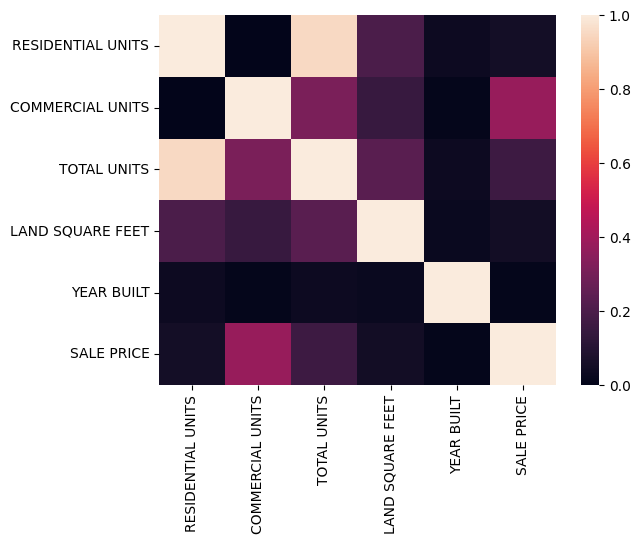

In [ ]:
corr = df_notna.corr(numeric_only=True)
sns.heatmap(corr)

14) Crie um diagrama de dispersão para apresentar a relação entre os atributos LAND SQUARE FEET e SALE PRICE, usando o atributo BOROUGH para atribuir cores diferentes aos pontos.

<Axes: xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

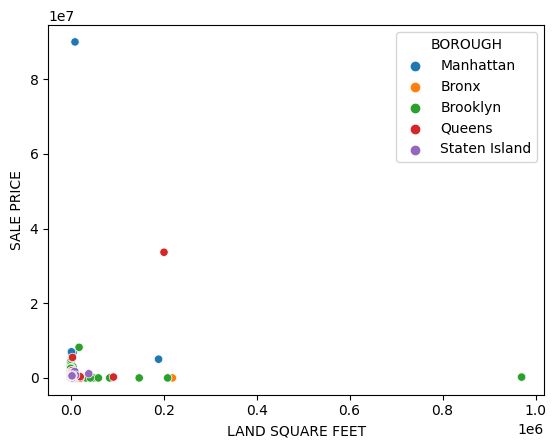

In [ ]:
sns.scatterplot(df_notna, x='LAND SQUARE FEET', y='SALE PRICE', hue='BOROUGH')

15) Crie um gráfico de colunas para apresentar a média da variável SALE PRICE para cada valor do atributo BOROUGH.

<Axes: xlabel='BOROUGH', ylabel='SALE PRICE'>

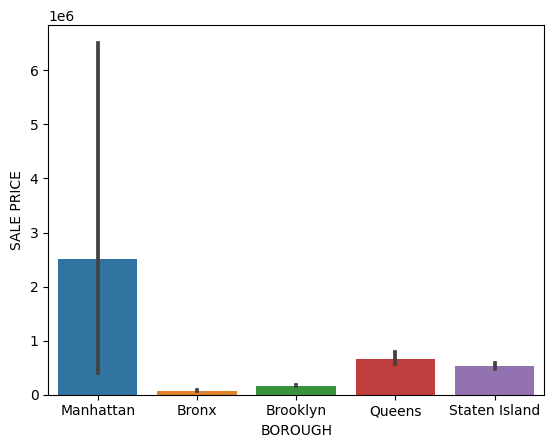

In [ ]:
new = df_notna
sale_group = new.groupby(['BOROUGH'])['SALE PRICE'].mean().reset_index()
x = sale_group['BOROUGH'].to_numpy()
y = sale_group['SALE PRICE'].to_numpy()
sns.barplot(new, x='BOROUGH', y='SALE PRICE')

16) Crie um gráfico de colunas para apresentar a média da variável SALE PRICE para cada valor do atributo TAX CLASS AT TIME OF SALE.

[175346.57214223 288159.3521987       0.         155712.31223176]


<Axes: xlabel='TAX CLASS AT TIME OF SALE', ylabel='SALE PRICE'>

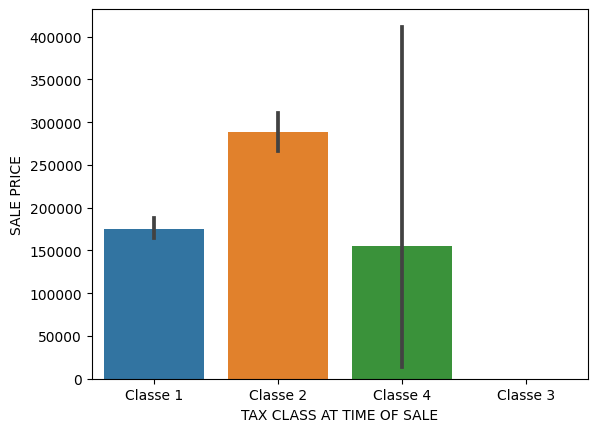

In [ ]:
sale_group = new.groupby('TAX CLASS AT TIME OF SALE')['SALE PRICE'].mean().reset_index()
x = sale_group['TAX CLASS AT TIME OF SALE'].to_numpy()
y = sale_group['SALE PRICE'].to_numpy()
print(y)
sns.barplot(new, x='TAX CLASS AT TIME OF SALE', y='SALE PRICE')

17) Altere a representação dos campos BOROUGH e TAX CLASS AT TIME OF SALE para a codificação binária.

In [ ]:
def borough(row):
  if row == 'Manhattan':
      return 0
  elif row == 'Bronx':
    return 1
  elif row == 'Brooklyn':
    return 2
  elif row == 'Queens':
    return 3
  else: return 4

def tax_class(row):
  if row == 'Classe 1':
    return 1
  elif row == 'Classe 2':
    return 2
  elif row == 'Classe 3':
    return 3
  else: return 4

new['BOROUGH'] = new['BOROUGH'].apply(borough)
new['TAX CLASS AT TIME OF SALE'] = new['TAX CLASS AT TIME OF SALE'].apply(tax_class)

In [ ]:
unique = new['BUILDING CLASS CATEGORY'].unique().tolist()
def build_class(row):
  return unique.index(row)
new['BUILDING CLASS CATEGORY'] = new['BUILDING CLASS CATEGORY'].apply(build_class)

18) Crie um modelo de regressão com todos os atributos. Os dados devem ser divididos da seguinte maneira: 67% para treinamento e 33% para testes. Além disto, use o valor 0 como a semente aleatória deste método.

Apresente os coeficientes da equação e o valor de r2 deste modelo.



In [ ]:
X = new.drop(['SALE PRICE'] ,axis='columns')
y = new['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [ 0.00000000e+00  3.23089658e+03  2.24078685e+05  2.11025425e+05
 -2.21237506e+05 -1.16239947e-02 -3.95108114e-01  0.00000000e+00]
b =  187915.39407990663
Coeficiente de determinação:  -0.035937375537078875
Erro quadrado médio:  4452577071717.78


19) Crie um modelo de regressão com menos atributos (o método para escolha dos atributos fica à escolha do aluno). Os dados devem ser divididos da seguinte maneira: 67% para treinamento e 33% para testes. Além disto, use o valor 0 como a semente aleatória deste método.

Apresente os coeficientes da equação e o valor de r2 deste modelo.


BOROUGH                           NaN
BUILDING CLASS CATEGORY      0.067099
RESIDENTIAL UNITS            0.310949
COMMERCIAL UNITS             0.262344
TOTAL UNITS                  0.377085
LAND SQUARE FEET             0.229970
YEAR BUILT                   0.106683
TAX CLASS AT TIME OF SALE         NaN
SALE PRICE                   0.233869
dtype: float64


<Axes: >

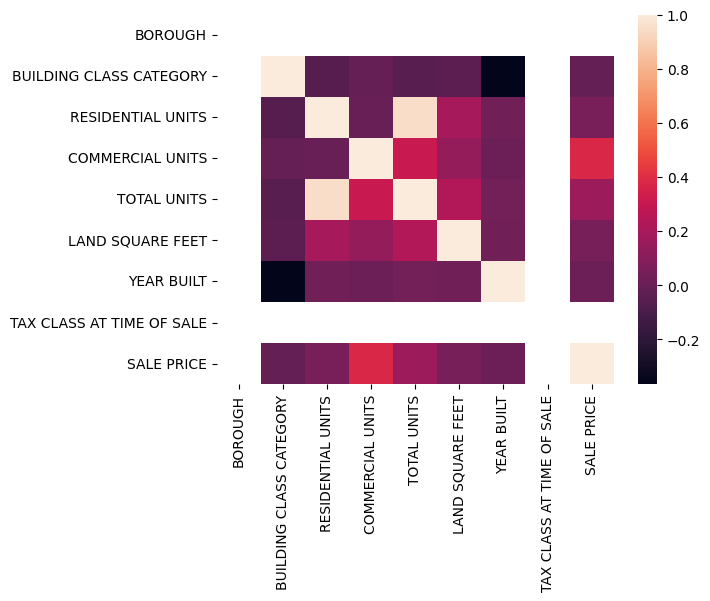

In [ ]:
corr = new.corr(numeric_only=True)
print(corr.mean())
sns.heatmap(corr)

In [ ]:
new2 = new.copy(deep=True)
new2.drop(['BOROUGH', 'TAX CLASS AT TIME OF SALE'], axis=1, inplace=True)

X = new2.drop(['SALE PRICE'] ,axis='columns')
y = new2['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ", mse)

Coeficientes da reta: 

a =  [ 3.23089658e+03  2.24078685e+05  2.11025425e+05 -2.21237506e+05
 -1.16239947e-02 -3.95108114e-01]
b =  187915.39407985515
Coeficiente de determinação:  -0.03593737553317067
Erro quadrado médio:  4452577071700.983


20)Compare os resultados e indique qual dos modelos você escolheria. Justifique sua resposta.

Os atributos 'BOROUGH' e 'TAX CLASS AT TIME OF SALE' foram removidos, na primeira execução eles foram utilizados e seus pesos se mantiveram zerados, na segunda execução, sem os dois atributos, o resultado foi o mesmo e com uma quantidade menor de informação para processar

In [ ]:
new2 = new.copy(deep=True)
new2 = pd.get_dummies(new2, columns=['BOROUGH', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY'])

X = new2.drop(['SALE PRICE'] ,axis='columns')
y = new2['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ", mse)

Coeficientes da reta: 

a =  [ 5.42220366e+04  8.78151860e+04 -5.10618183e+04 -2.45160986e-01
  4.12204918e+01 -3.20142135e-10 -5.82076609e-11  1.70917089e+05
  4.17042919e+03  6.93894422e+04 -1.20692362e+05 -1.37702427e+05
 -4.74319913e+04  6.38506112e+04  3.29204271e+04  7.92731265e+04
 -2.84240895e+04 -2.97429289e+04 -1.06634489e+05  4.12836868e+03
  3.58664462e+05  1.61051139e+04  1.16415322e-10 -1.94161876e+05
  1.55377983e+05  1.55194820e+05 -1.45519152e-11  3.11981044e+03
 -4.22573458e+04 -5.35573000e+04 -1.04475985e+05  2.08364725e+05
  1.96838453e+05 -3.37552047e+05 -1.02985771e+05 -1.42487095e+05
 -3.18011144e+04 -4.58780380e+04 -1.34599352e+05 -5.90699339e+04
  2.39906448e+04  1.77148641e+05]
b =  27286.807890615542
Coeficiente de determinação:  0.10306998758589558
Erro quadrado médio:  3855107560087.876


A Adição de dummies aumentou o coeficiente de determinação e diminuiu o erro quadrado médio

In [ ]:
new2 = new.copy(deep=True)
new2.drop(['BOROUGH', 'TAX CLASS AT TIME OF SALE'], axis=1, inplace=True)
new2 = pd.get_dummies(new2, columns=['BUILDING CLASS CATEGORY'])

X = new2.drop(['SALE PRICE'] ,axis='columns')
y = new2['SALE PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ", mse)

Coeficientes da reta: 

a =  [ 5.42220366e+04  8.78151860e+04 -5.10618183e+04 -2.45160986e-01
  4.12204918e+01  1.70917089e+05  4.17042919e+03  6.93894422e+04
 -1.20692362e+05 -1.37702427e+05 -4.74319913e+04  6.38506112e+04
  3.29204271e+04  7.92731265e+04 -2.84240895e+04 -2.97429289e+04
 -1.06634489e+05  4.12836868e+03  3.58664462e+05  1.61051139e+04
 -6.18456397e-11 -1.94161876e+05  1.55377983e+05  1.55194820e+05
 -5.82076609e-11  3.11981044e+03 -4.22573458e+04 -5.35573000e+04
 -1.04475985e+05  2.08364725e+05  1.96838453e+05 -3.37552047e+05
 -1.02985771e+05 -1.42487095e+05 -3.18011144e+04 -4.58780380e+04
 -1.34599352e+05 -5.90699339e+04  2.39906448e+04  1.77148641e+05]
b =  27286.807890628843
Coeficiente de determinação:  0.10306998758447827
Erro quadrado médio:  3855107560093.9673


A utilização de dummies removendo as duas colunas do primeiro experimento, manteve o resultado do terceiro experimento, mesmo com 2 colunas a menos. Por este motive e por obter um erro menor com um maior coeficiente, eu escolho a opção 4.